# Method selection experiments using pycaret

## Before all
Need to install ipykernel for this virtual envronment to execute this jupyter python notebook.

In [3]:
import os

# Get current cwd
current_dir = os.path.dirname(os.path.abspath("__file__")) # /src/model_selection

# If the cwd is not set properly, change it to the right cwd
while not os.getcwd().endswith("demography-predictor"):
    os.chdir(os.path.join(current_dir,".."))

# Verify the correct directory (should end with demography-predictor)
print(os.getcwd()) 
assert os.getcwd().endswith("demography-predictor")

/Users/andrew/Andrew/School/4BIT/bc_thesis/demography-predictor


In [5]:
# Standard library imports
import logging
import pandas as pd
from typing import List, Dict, Any
import matplotlib.pyplot as plt

# Pycaret imports
from pycaret.regression import *

# Custom imports
from src.utils.log import setup_logging, Config


## Basic config 

In [6]:
# Get config
config = Config()

# Get logger
logger = logging.getLogger("method_selection")

# Setup logging
setup_logging()

## Load data 

In [7]:
def load_data() -> pd.DataFrame:
    # Load data from file
    data = pd.read_csv(config.dataset_path)

    # Rename columns to all lower
    mapper = {col: col.lower() for col in data.columns}

    data.rename(columns=mapper, inplace=True)
    return data

## Define regression experiment functions

In [19]:
def regression_experiment(data: pd.DataFrame, target: str, session_id: int) -> List[Any]:
    # Setup experiment
    experiment = setup(data, target=target, session_id=session_id)

    best_model = compare_models()

    return best_model

def plot_results(best_model: List[Any]) -> None:
    # Plot Residuals
    plot_model(best_model, plot="residuals")

    # Plot Prediction Error
    plot_model(best_model, plot="error")

    # Plot Feature Importance
    plot_model(best_model, plot="feature")

    # Plot Learning Curve
    plot_model(best_model, plot="learning")

## Experiment 1: using whole dataset
Input: whole dataset, Target: population, total

In [20]:
# Load data 
data_df = load_data()

# Run experiment
best_model = regression_experiment(data=data_df, target="population, total", session_id=123)

,Description,Value
0,Session id,123
1,Target,"population, total"
2,Target type,Regression
3,Original data shape,"(12387, 20)"
4,Transformed data shape,"(12387, 20)"
5,Transformed train set shape,"(8670, 20)"
6,Transformed test set shape,"(3717, 20)"
7,Numeric features,18
8,Categorical features,1
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3174672.0977,218060860620244.1875,13506389.2815,0.9997,0.4745,0.7453,0.4260
xgboost,Extreme Gradient Boosting,8944422.9000,558540696374476.8125,23406355.8000,0.9991,1.0952,3.3591,0.0950
lightgbm,Light Gradient Boosting Machine,10315333.6043,635845459966882.3750,24731983.2460,0.9990,1.1925,4.6126,0.2720
rf,Random Forest Regressor,7719631.3369,792651352500768.8750,27701077.9790,0.9987,0.6072,1.2215,1.9260
gbr,Gradient Boosting Regressor,20482080.3373,1412817282008174.5000,37397086.5641,0.9977,1.6571,13.5967,0.8810
dt,Decision Tree Regressor,10141991.7256,1983458808003716.2500,42089245.9573,0.9966,0.4436,0.7966,0.0490
ada,AdaBoost Regressor,151699763.3508,28315504028139408.0000,167501302.6982,0.9538,3.5115,166.1649,0.1740
knn,K Neighbors Regressor,52198264.8000,40523828186578944.0000,198741155.2000,0.9363,0.3359,0.8095,0.0160
ridge,Ridge Regression,116857822.4528,49943062536956240.0000,222238018.1978,0.9202,2.8804,99.7146,0.0120
lasso,Lasso Regression,116859385.3375,49943714119145440.0000,222239338.7409,0.9202,2.8810,99.7260,0.0490


### Experiment 1 best model plots

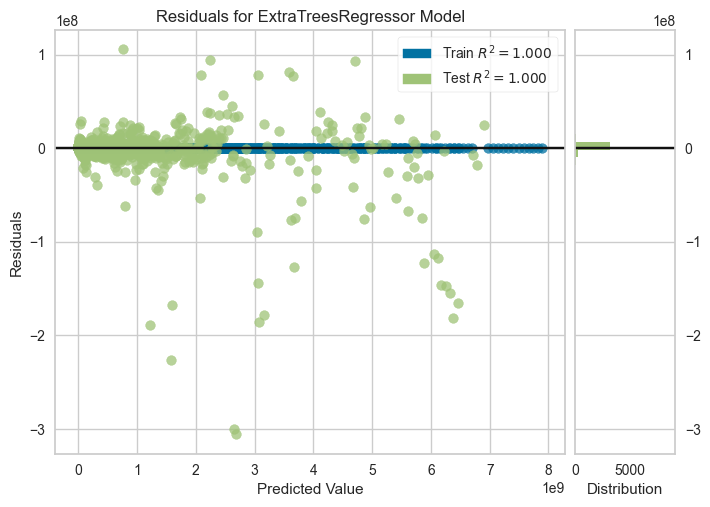

In [10]:
# Plot Residuals
plot_model(best_model, plot="residuals")

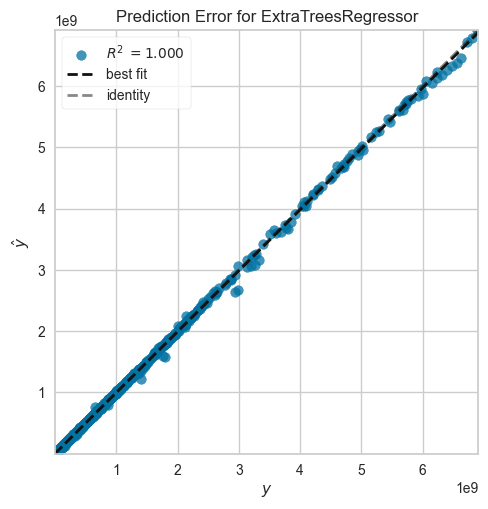

In [ ]:
# Plot Error
plot_model(best_model, plot="error")

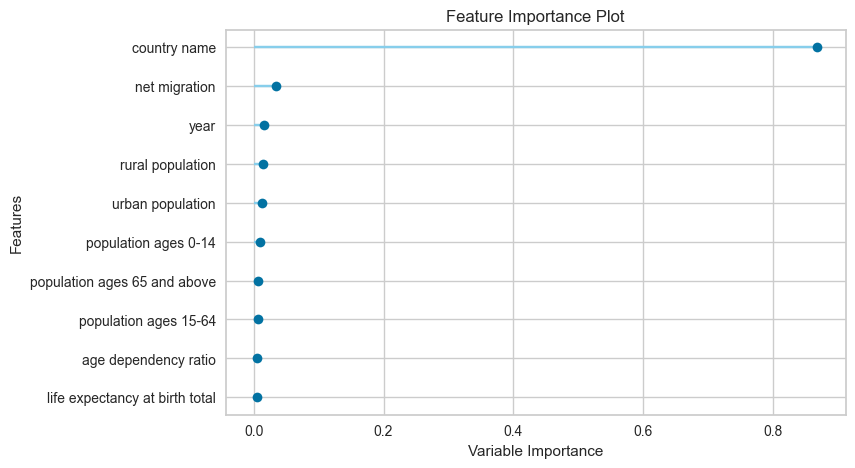

In [12]:
# Plot Feature Importance
plot_model(best_model, plot="feature")

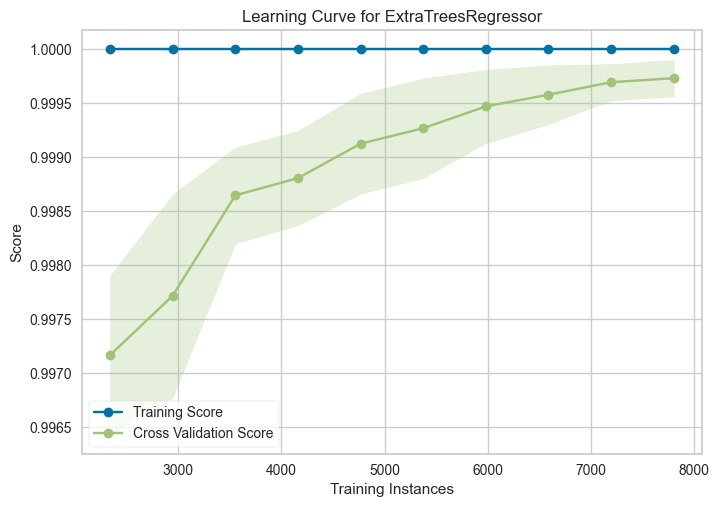

In [13]:
# Plot Learning Curve
plot_model(best_model, plot="learning")

## Experiment 2: Exclude the country name
*Hypothesis:* The population can be generalized. (Any population would be developing in the same manner if it had the same population parameters). 

In [27]:
# Adjust data for experiment condition
# Copy the original dataframe
exp_2_df = data_df.copy()

# Extract data from the original dataframe
exp_2_df = exp_2_df.drop(columns=['country name'])


In [28]:
# Run the experiment
best_model_2 = regression_experiment(data=exp_2_df, target='population, total', session_id=234)

,Description,Value
0,Session id,234
1,Target,"population, total"
2,Target type,Regression
3,Original data shape,"(12387, 19)"
4,Transformed data shape,"(12387, 19)"
5,Transformed train set shape,"(8670, 19)"
6,Transformed test set shape,"(3717, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,26481484.8266,8991669791027642.0000,90684213.2551,0.9864,1.2251,10.6533,0.4180
lightgbm,Light Gradient Boosting Machine,60101404.5286,27589893795943784.0000,161282954.2012,0.9582,1.9740,32.3261,0.2640
xgboost,Extreme Gradient Boosting,69927910.4000,28986327762049432.0000,164829013.6000,0.9559,2.3008,51.0471,0.0720
rf,Random Forest Regressor,57016038.4424,40144567812959824.0000,193883047.9304,0.9390,1.3272,26.0669,2.1870
dt,Decision Tree Regressor,52831845.7622,87712824508029456.0000,283403698.8940,0.8663,0.9524,29.4298,0.0500
gbr,Gradient Boosting Regressor,154263484.6360,105531525532557312.0000,323139599.7630,0.8360,2.8309,105.2964,0.8450
ada,AdaBoost Regressor,309435439.7958,148313588265979232.0000,384887203.0591,0.7661,3.8680,276.2868,0.1930
knn,K Neighbors Regressor,188940219.2000,240854979911352320.0000,489515356.8000,0.6172,1.8356,39.9515,0.0090
en,Elastic Net,364879898.9554,486925730356758336.0000,695937483.1917,0.2420,3.7181,283.2445,0.0470
ridge,Ridge Regression,364228330.8337,486626130982497536.0000,695781844.2066,0.2420,3.7003,271.9839,0.0070


### Experiment 2 results

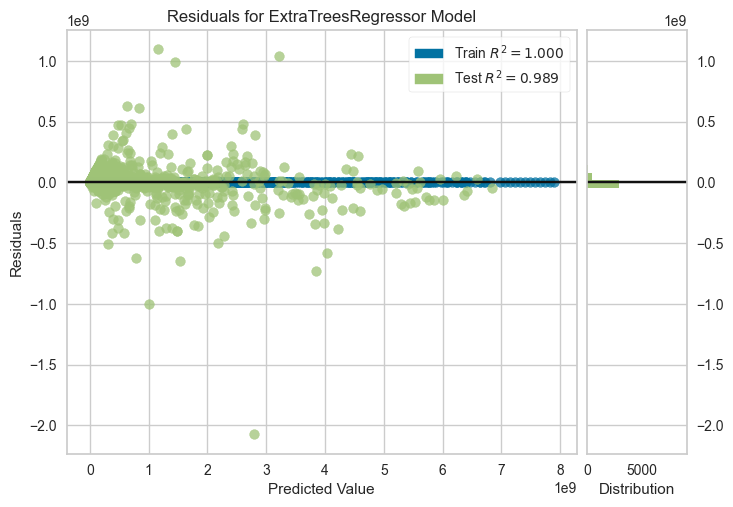

In [29]:
# Plot Residuals
plot_model(best_model_2, plot="residuals")

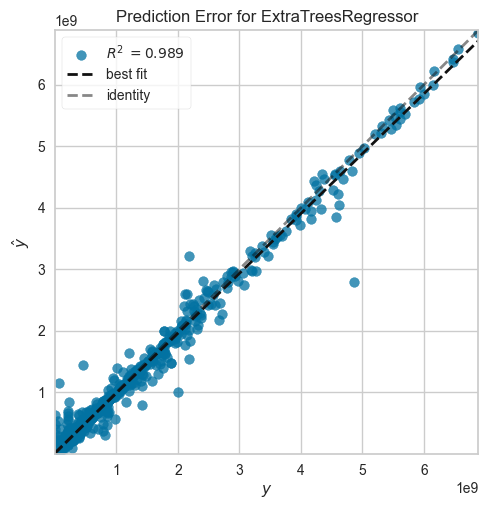

In [30]:
# Plot Error
plot_model(best_model_2, plot="error")

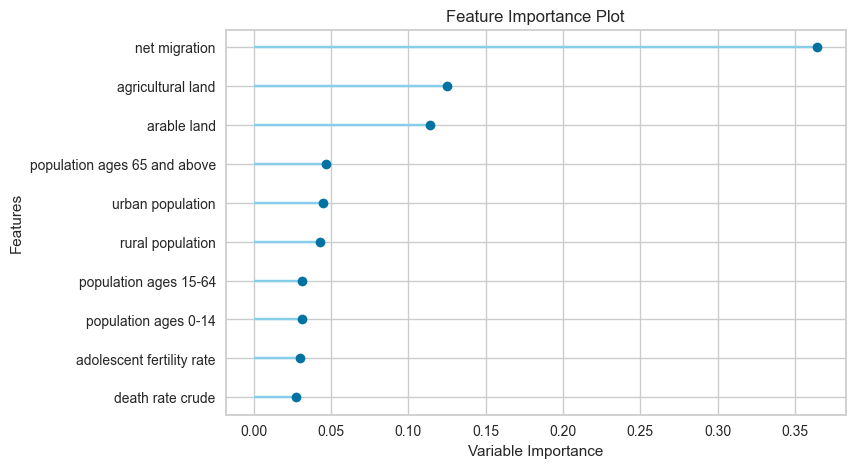

In [31]:
# Plot Feature Importance
plot_model(best_model_2, plot="feature")

In [ ]:
# Plot Learning Curve
plot_model(best_model_2, plot="learning")

## Experiment 3: Exclude the percantage of age groups.

*Hypothesis 1:* Exclude targets of also predicted values.
*Hypothesis 2:* Exclude targets of also predicted values and also the country name.


## Hypothesis 1
*Hypothesis 1:* Exclude targets of also predicted values.

In [33]:
# Adjust data for experiment condition
drop_columns_for_experiment_3 = ['population ages 0-14','population ages 15-64' , 'population ages 65 and above']

# Copy original data
exp_3_1_df = data_df.copy()

# Drop columns 
exp_3_1_df = exp_3_1_df.drop(columns=drop_columns_for_experiment_3)

In [34]:
# Run the experiment
best_model_3_1 = regression_experiment(data=exp_3_1_df, target='population, total', session_id=345)

,Description,Value
0,Session id,345
1,Target,"population, total"
2,Target type,Regression
3,Original data shape,"(12387, 17)"
4,Transformed data shape,"(12387, 17)"
5,Transformed train set shape,"(8670, 17)"
6,Transformed test set shape,"(3717, 17)"
7,Numeric features,15
8,Categorical features,1
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3181463.5777,188597658745284.9375,13134727.5247,0.9997,0.5152,0.9008,0.3810
lightgbm,Light Gradient Boosting Machine,10972722.2754,756072678403282.5000,26888851.3496,0.9988,1.2172,4.9326,0.2620
xgboost,Extreme Gradient Boosting,9546473.1000,725168864991641.6250,26613343.2000,0.9988,1.0687,3.7889,0.0680
rf,Random Forest Regressor,7869717.7484,848364689528057.7500,28905555.6345,0.9986,0.6567,2.1178,1.5680
gbr,Gradient Boosting Regressor,21035320.7081,1553738369843144.2500,39139421.5623,0.9974,1.6759,15.0965,0.7350
dt,Decision Tree Regressor,10902508.2746,3249400783940583.0000,54373108.1131,0.9946,0.5247,3.4299,0.0430
knn,K Neighbors Regressor,46574529.2000,28347948304485580.0000,166161044.0000,0.9540,0.3214,0.8410,0.0150
ada,AdaBoost Regressor,164082173.7397,32846375079177324.0000,180062309.9823,0.9455,3.5727,184.2138,0.1510
ridge,Ridge Regression,111069938.4784,48334383300820208.0000,218762896.3136,0.9220,2.8357,95.5628,0.0100
llar,Lasso Least Angle Regression,111074478.2525,48336548115491160.0000,218767896.4181,0.9220,2.8362,95.5733,0.0110


### Experiment 3, hypothesis 1 result plots

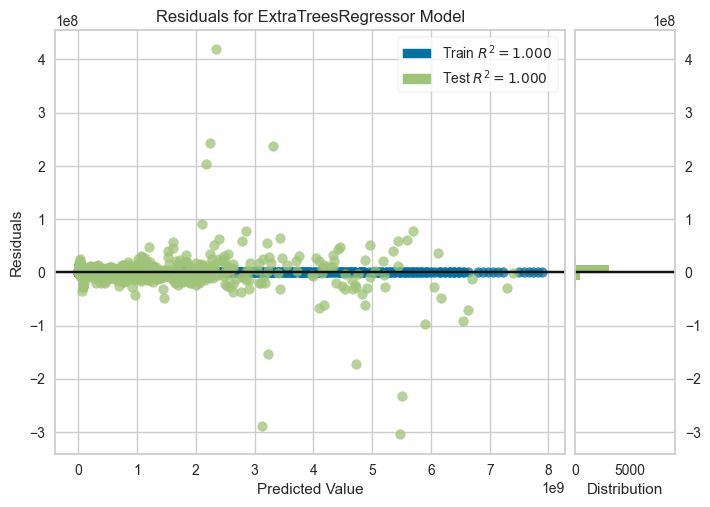

In [35]:
# Plot Residuals
plot_model(best_model_3_1, plot="residuals")

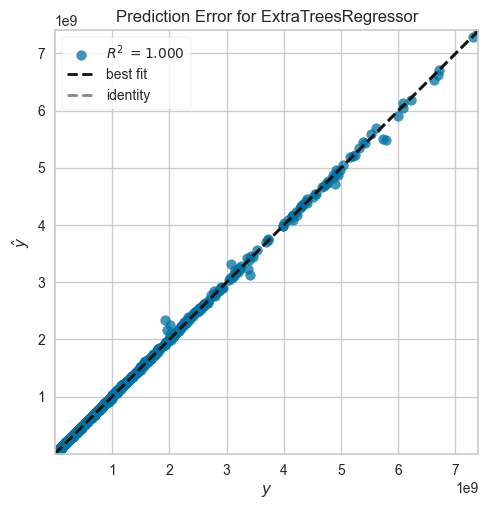

In [36]:
# Plot Error
plot_model(best_model_3_1, plot="error")

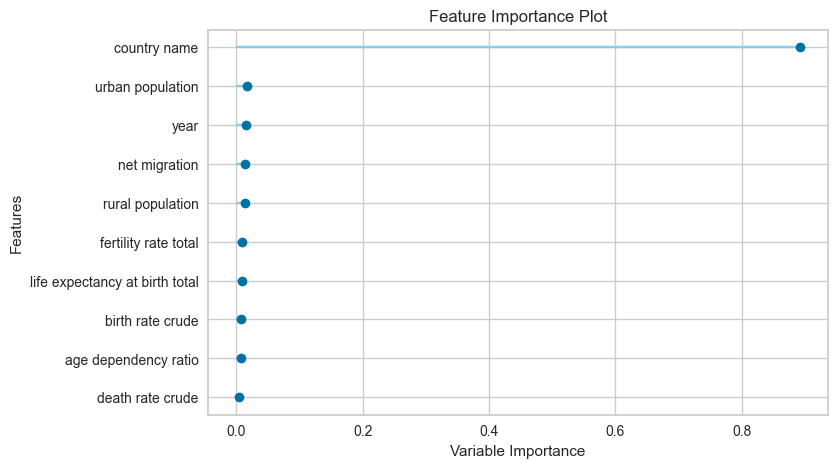

In [37]:
# Plot Feature Importance
plot_model(best_model_3_1, plot="feature")

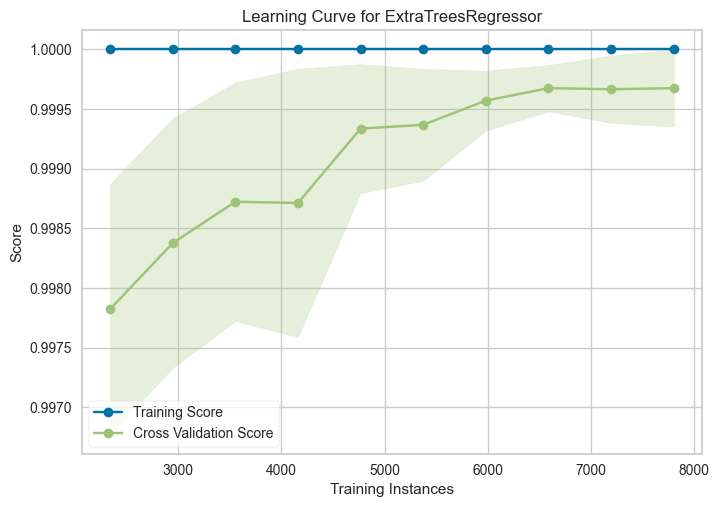

In [38]:
# Plot Learning Curve
plot_model(best_model_3_1, plot="learning")

## Hypothesis 2
*Hypothesis 2:* Exclude targets of also predicted values and also the country name.

In [39]:
# Adjust data for experiment condition
drop_columns_for_experiment_3_2 = ['population ages 0-14','population ages 15-64' , 'population ages 65 and above','country name']

# Copy original data
exp_3_2_df = data_df.copy()

# Drop columns 
exp_3_2_df = exp_3_2_df.drop(columns=drop_columns_for_experiment_3_2)

In [40]:
# Run the experiment
best_model_3_2 = regression_experiment(data=exp_3_2_df, target='population, total', session_id=456)

,Description,Value
0,Session id,456
1,Target,"population, total"
2,Target type,Regression
3,Original data shape,"(12387, 16)"
4,Transformed data shape,"(12387, 16)"
5,Transformed train set shape,"(8670, 16)"
6,Transformed test set shape,"(3717, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,27255067.6272,9478361041781812.0000,95882792.4476,0.9843,1.1944,10.0886,0.3550
lightgbm,Light Gradient Boosting Machine,61559029.9237,29141129634768372.0000,169380438.8988,0.9527,1.9933,29.2589,0.2570
xgboost,Extreme Gradient Boosting,71662913.6000,28855441425432576.0000,168853793.6000,0.9527,2.2940,54.9286,0.0630
rf,Random Forest Regressor,56278215.4349,38275737943245288.0000,191964674.0219,0.9390,1.3146,14.6863,1.6500
dt,Decision Tree Regressor,60001538.5946,98948905625629552.0000,308841136.6907,0.8407,1.0254,8.7582,0.0410
gbr,Gradient Boosting Regressor,155714369.2821,113362852820127664.0000,332284095.0590,0.8194,2.8390,108.1136,0.7050
ada,AdaBoost Regressor,303261560.2911,147288676589864576.0000,383390169.8102,0.7561,3.8335,269.5930,0.1700
knn,K Neighbors Regressor,188924180.8000,228732321331255712.0000,476744700.8000,0.6199,1.8563,40.5573,0.0090
ridge,Ridge Regression,359572097.0317,458616460202351296.0000,672699633.9427,0.2609,3.7094,299.9674,0.0060
llar,Lasso Least Angle Regression,359562369.7287,458643523794661824.0000,672716850.3190,0.2609,3.7077,300.0949,0.0070


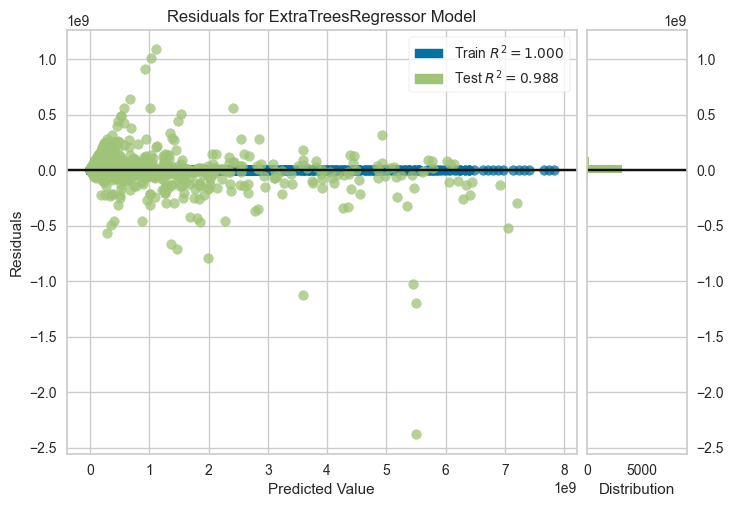

In [41]:
# Plot Residuals
plot_model(best_model_3_2, plot="residuals")

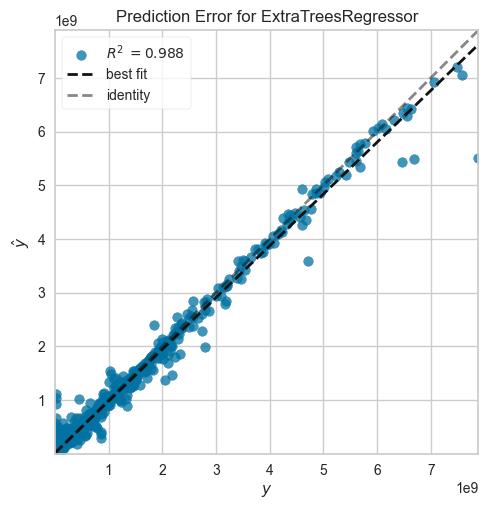

In [42]:
# Plot Error
plot_model(best_model_3_2, plot="error")

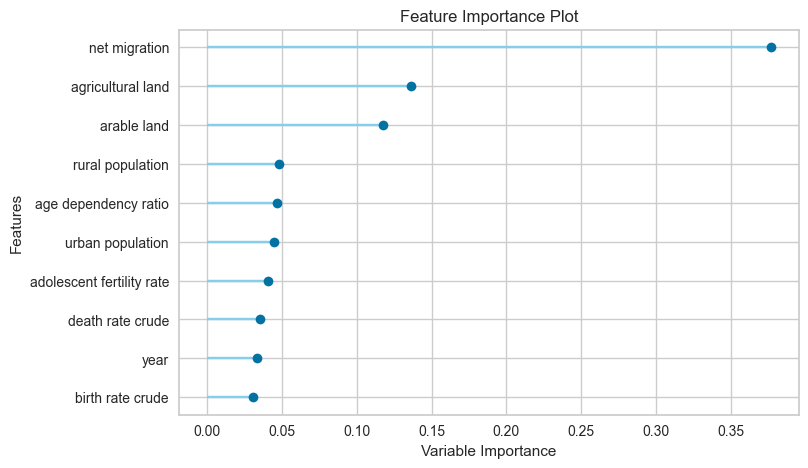

In [43]:
# Plot Feature Importance
plot_model(best_model_3_2, plot="feature")

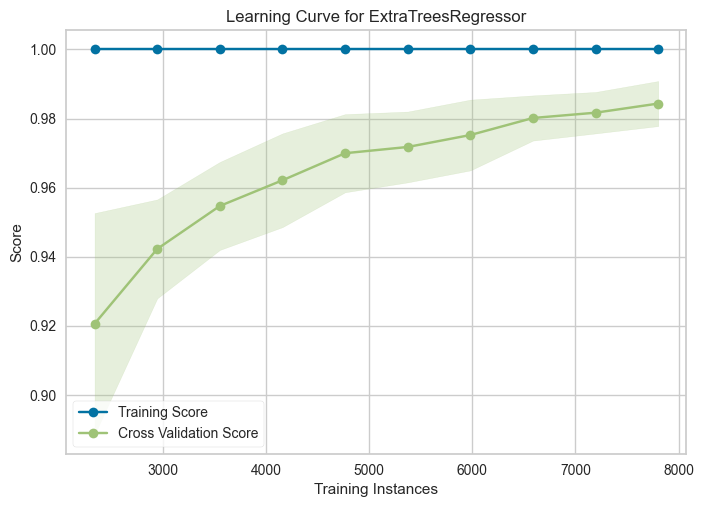

In [44]:
# Plot Learning Curve
plot_model(best_model_3_2, plot="learning")